In [3]:
import pandas as pd
import numpy as np

time: 3.21 ms (started: 2024-03-30 09:50:18 +07:00)


# Read dataset in JSON

In [5]:
df = pd.read_json('/Users/dafinazwa/Downloads/titanic_json.json')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S


time: 134 ms (started: 2024-03-30 10:25:09 +07:00)


In [6]:
df.shape

(891, 12)

time: 3.96 ms (started: 2024-03-30 10:25:18 +07:00)


# Preprocessing

Kolom yang akan menjadi prediktor adalah Pclass, Sex, Age, SibSp, Parch, Fare, Cabin, dan Embarked.

Kolom respon adalah Survived.

Kolom dengan data non-angka akan diubah menjadi angka dengan teknik categorical label encoding.

Sebagai contoh, Sex:male diberi label 1, Sex:female diberi label 2.

Missing value pada kolom kategorik (Pclass, Sex, SibSp, Parch, Cabin, dan Embarked) akan diisi dengan nilai modus.

Missing value pada kolom numerik (Fare, Age) akan diisi dengan median.

#### Pisahkan X dan y

In [7]:
# Pilih variabel X yang sudah dalam bentuk angka
X_angka = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]

# Pilih variabel X yang masih bukan angka
X_kategorik = df[['Sex', 'Cabin', 'Embarked']]

# Pilih variabel Y
y = df['Survived']

time: 37 ms (started: 2024-03-30 10:25:46 +07:00)


### Cek Missing Value

In [8]:
X_angka.isna().sum()

Pclass      0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64

time: 27.8 ms (started: 2024-03-30 10:26:21 +07:00)


In [9]:
X_kategorik.isna().sum()

Sex           0
Cabin       687
Embarked      2
dtype: int64

time: 8.66 ms (started: 2024-03-30 10:26:29 +07:00)


### Ubah kolom non-angka ke dalam angka dengan label encoding

Kolom yg ingin kita ubah adalah Sex, Cabin, dan Embarked.

In [10]:
from sklearn.preprocessing import LabelEncoder
X_encode = X_kategorik.apply(LabelEncoder().fit_transform)
X_encode

,Sex,Cabin,Embarked
0,1,147,2
1,0,81,0
2,0,147,2
3,0,55,2
4,1,147,2
...,...,...,...
886,1,147,2
887,0,30,2
888,0,147,2
889,1,60,0


time: 2.41 s (started: 2024-03-30 10:27:01 +07:00)


### Cek Missing Value setelah OHE

In [11]:
X_encode['Embarked'].value_counts()

2    644
0    168
1     77
3      2
Name: Embarked, dtype: int64

time: 24.2 ms (started: 2024-03-30 10:27:34 +07:00)


In [12]:
X_encode['Cabin'].value_counts()

147    687
63       4
145      4
47       4
62       3
      ... 
124      1
76       1
72       1
125      1
60       1
Name: Cabin, Length: 148, dtype: int64

time: 8.41 ms (started: 2024-03-30 10:27:41 +07:00)


### Ubah angka 147 pada Kolom Cabin dan angka 3 pada kolom Embarked menjadi NaN

In [13]:
X_encode['Cabin'].replace(147, np.nan, inplace=True)
X_encode['Embarked'].replace(3, np.nan, inplace=True)
X_encode

,Sex,Cabin,Embarked
0,1,NaN,2.0
1,0,81.0,0.0
2,0,NaN,2.0
3,0,55.0,2.0
4,1,NaN,2.0
...,...,...,...
886,1,NaN,2.0
887,0,30.0,2.0
888,0,NaN,2.0
889,1,60.0,0.0


time: 21.5 ms (started: 2024-03-30 10:28:12 +07:00)


In [14]:
# Gabung hasilnya menjadi satu kesatuan yang utuh
X = pd.concat([X_angka, X_encode], axis = 1)
X

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,3,22.0,1,0,7.2500,1,NaN,2.0
1,1,38.0,1,0,71.2833,0,81.0,0.0
2,3,26.0,0,0,7.9250,0,NaN,2.0
3,1,35.0,1,0,53.1000,0,55.0,2.0
4,3,35.0,0,0,8.0500,1,NaN,2.0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,NaN,2.0
887,1,19.0,0,0,30.0000,0,30.0,2.0
888,3,NaN,1,2,23.4500,0,NaN,2.0
889,1,26.0,0,0,30.0000,1,60.0,0.0


time: 25.1 ms (started: 2024-03-30 10:28:24 +07:00)


### Observasi ada tidaknya missing value

In [15]:
X.isna().sum()

Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Sex           0
Cabin       687
Embarked      2
dtype: int64

time: 17.4 ms (started: 2024-03-30 10:28:49 +07:00)


### Isi missing value kolom angka (Age) dengan median

In [16]:
X['Age'].fillna(X['Age'].median(), inplace = True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,3,22.0,1,0,7.2500,1,NaN,2.0
1,1,38.0,1,0,71.2833,0,81.0,0.0
2,3,26.0,0,0,7.9250,0,NaN,2.0
3,1,35.0,1,0,53.1000,0,55.0,2.0
4,3,35.0,0,0,8.0500,1,NaN,2.0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,NaN,2.0
887,1,19.0,0,0,30.0000,0,30.0,2.0
888,3,28.0,1,2,23.4500,0,NaN,2.0
889,1,26.0,0,0,30.0000,1,60.0,0.0


time: 28.3 ms (started: 2024-03-30 10:30:03 +07:00)


### Isi missing value kolom kategorik dengan modus

In [17]:
X['Cabin'].fillna(X['Cabin'].mode()[0], inplace = True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace = True)
X

,Pclass,Age,SibSp,Parch,Fare,Sex,Cabin,Embarked
0,3,22.0,1,0,7.2500,1,47.0,2.0
1,1,38.0,1,0,71.2833,0,81.0,0.0
2,3,26.0,0,0,7.9250,0,47.0,2.0
3,1,35.0,1,0,53.1000,0,55.0,2.0
4,3,35.0,0,0,8.0500,1,47.0,2.0
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,47.0,2.0
887,1,19.0,0,0,30.0000,0,30.0,2.0
888,3,28.0,1,2,23.4500,0,47.0,2.0
889,1,26.0,0,0,30.0000,1,60.0,0.0


time: 30.2 ms (started: 2024-03-30 10:30:39 +07:00)


In [18]:
X.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex         0
Cabin       0
Embarked    0
dtype: int64

time: 6.92 ms (started: 2024-03-30 10:30:47 +07:00)


# Train Test Split

Setelah data 'bersih', saatnya kita bikin model sesuai kreativitas masing2

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.23923, random_state = 455518)

time: 9.87 ms (started: 2024-03-30 10:33:16 +07:00)


# Evaluation Function

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
def evaluate_classification(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    return {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-score': f1}

time: 835 µs (started: 2024-03-30 10:33:26 +07:00)


# Model

In [21]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading

time: 612 ms (started: 2024-03-30 10:31:36 +07:00)


## Support Vector Machine

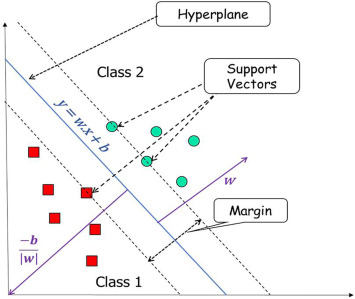

Support Vector Machine adalah salah satu metode dalam supervised learning yang biasanya digunakan untuk klasifikasi ataupun regresi. Dalam pemodelan klasifikasi, support vector machine memiliki konsep yang lebih matang serta jelas secara matematis dibandingkan dengan teknik klasifikasi lainnya. Support vector machine juga dapat mengatasi masalah klasifikasi dan regresi dengan metode linear maupun non linear.

Algoritma support vector machine digunakan untuk mencari hyperplane terbaik dalam ruang N-dimensi yang secara jelas mengklasifikasikan titik data. Hyperplane adalah sebuah fungsi yang digunakan sebagai pemisah antar kelas yang satu dengan yang lain. Fungsi ini digunakan untuk mengklasifikasikan di dalam ruang kelas dimensi yang lebih tinggi.

Dalam bentuk 2 dimensi, fungsi yang digunakan untuk mengklasifikasikan antar kelas disebut dengan line whereas. Sedangkan fungsi yang digunakan untuk mengklasifikasikan antar kelas dalam bentuk 3 dimensi disebut plane similarly.

Seperti yang dijelaskan diatas bahwa support vector machine adalah sebuah algoritma yang digunakan untuk mencari hyperplane terbaik diantara dataset. Untuk mendapatkan pemahaman lebih jelas terkait cara kerja support vector machine terdapat sebuah contoh.

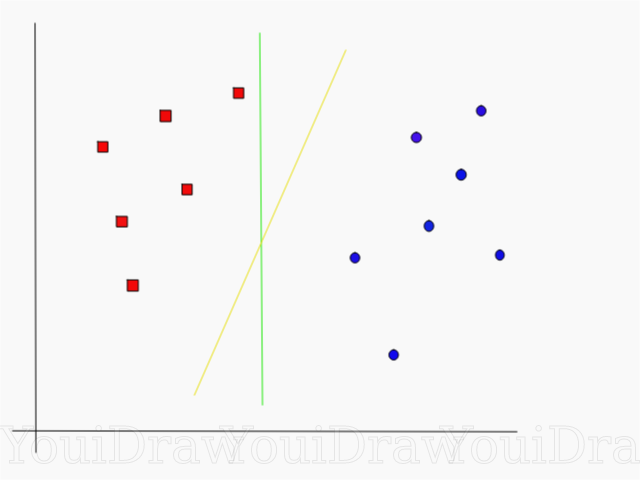

Dapat dilihat pada gambar di atas, ibaratkan terdapat sebuah dataset. Pada gambar tersebut, terlihat ada kotak merah dan juga lingkaran biru. Support vector machine akan digunakan untuk mencari garis ideal yang membagi kedua kelas dataset tersebut. Dilihat pada gambar tersebut terdapat dua kandidat garis yang membagi kedua kelas tersebut, yaitu garis hijau dan juga kuning.

Sekilas, terlihat bahwa garis kuning merupakan garis yang ideal untuk membagi kedua kelas tersebut. Dikarenakan posisinya yang terletak di tengah, berbeda dengan garis hijau yang terlihat lebih dekat ke kotak merah. Namun itu baru asumsi saja, untuk melihat garis mana yang paling terbaik digunakanlah algoritma support vector machine ini.

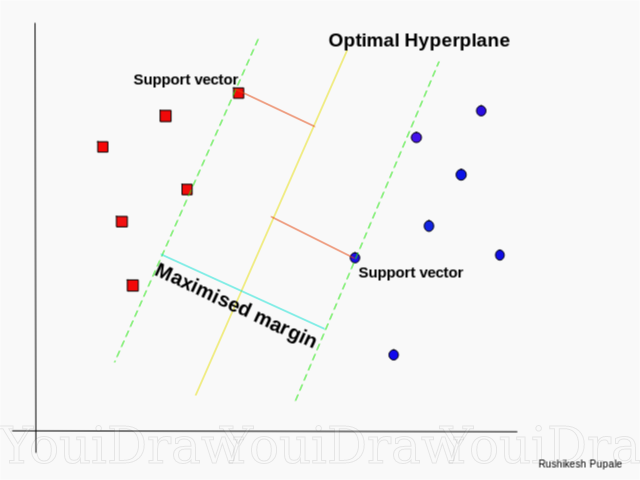

Sesuai dengan algoritma support vector machine, pertama ditentukan terlebih dahulu titik yang paling dekat dengan garis dari kedua kelas. Titik tersebut disebut dengan support vector. Setelah ditentukan, maka akan dihitung jarak antara garis dan support vector tersebut. Jarak ini dinamakan dengan margin. Tujuan dari algoritma ini adalah memaksimalkan margin yang ada, sehingga mendapatkan garis/hyperplane yang optimal.

In [27]:
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_pred = svm_clf.predict(x_test)
evaluate_classification(y_test, svm_pred)

              precision    recall  f1-score   support

           0       0.72      0.94      0.82       134
           1       0.80      0.40      0.53        80

    accuracy                           0.74       214
   macro avg       0.76      0.67      0.68       214
weighted avg       0.75      0.74      0.71       214



{'Accuracy': 0.7383177570093458,
 'Precision': 0.8,
 'Recall': 0.4,
 'F1-score': 0.5333333333333333}

time: 46.6 ms (started: 2024-03-30 10:33:53 +07:00)


## Decision Tree Classifier

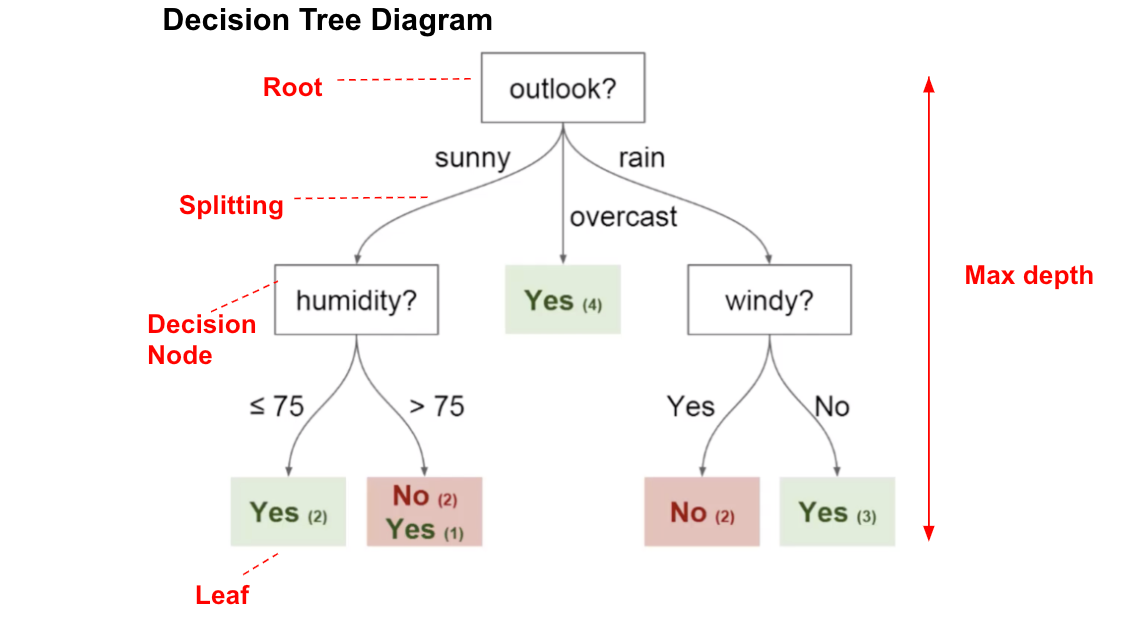

Algoritma decision tree adalah sebuah metode untuk membuat keputusan berdasarkan serangkaian pertanyaan yang terstruktur dalam bentuk pohon keputusan. Setiap simpul pada pohon keputusan mewakili sebuah pertanyaan atau kondisi, dan setiap cabang dari simpul tersebut mewakili jawaban atau aksi yang diambil berdasarkan kondisi tersebut. Proses membuat keputusan dimulai dari simpul paling atas (root node) dan bergerak ke bawah pohon sesuai dengan jawaban atau kondisi yang dipilih pada setiap simpul. Algoritma decision tree biasa digunakan dalam aplikasi machine learning untuk memprediksi keputusan atau klasifikasi suatu data berdasarkan fitur-fitur yang ada. Misalnya, sebuah algoritma decision tree dapat digunakan untuk memprediksi apakah seseorang akan membeli suatu produk berdasarkan fitur seperti usia, pendapatan, dan lokasi tempat tinggal.

In [55]:
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
evaluate_classification(y_test, dt_pred)

              precision    recall  f1-score   support

           0       0.79      0.95      0.86       134
           1       0.87      0.57      0.69        80

    accuracy                           0.81       214
   macro avg       0.83      0.76      0.78       214
weighted avg       0.82      0.81      0.80       214



{'Accuracy': 0.8084112149532711,
 'Precision': 0.8679245283018868,
 'Recall': 0.575,
 'F1-score': 0.6917293233082706}

time: 18 ms (started: 2024-03-30 10:50:14 +07:00)


## Ada Boost Classifier

In [35]:
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(x_train, y_train)
ada_pred = ada_clf.predict(x_test)
evaluate_classification(y_test, ada_pred)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       134
           1       0.81      0.76      0.79        80

    accuracy                           0.85       214
   macro avg       0.84      0.83      0.83       214
weighted avg       0.84      0.85      0.84       214



{'Accuracy': 0.8457943925233645,
 'Precision': 0.8133333333333334,
 'Recall': 0.7625,
 'F1-score': 0.7870967741935484}

time: 162 ms (started: 2024-03-30 10:36:26 +07:00)


## MLP Classifier

In [36]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)
mlp_clf.fit(x_train, y_train)
mlp_pred = mlp_clf.predict(x_test)
evaluate_classification(y_test, mlp_pred)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       134
           1       0.75      0.72      0.74        80

    accuracy                           0.81       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.81      0.81      0.81       214



{'Accuracy': 0.8084112149532711,
 'Precision': 0.7532467532467533,
 'Recall': 0.725,
 'F1-score': 0.7388535031847133}

time: 568 ms (started: 2024-03-30 10:37:05 +07:00)


# Random Forest

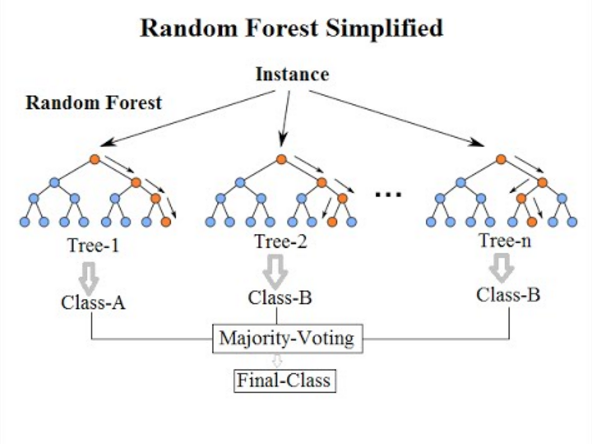

Random Forest adalah algoritma pembelajaran supervised. “Forest” yang dibangunnya adalah kumpulan decision tree, biasanya dilatih dengan metode “bagging”. Ide umum dari metode bagging adalah kombinasi model pembelajaran meningkatkan hasil keseluruhan. Sederhananya, Random Forest membangun beberapa decision tree dan menggabungkannya untuk mendapatkan prediksi yang lebih akurat dan stabil. Satu keuntungan besar dari Random Forest adalah dapat digunakan untuk masalah klasifikasi dan regresi, yang merupakan mayoritas sistem pembelajaran mesin saat ini.

In [37]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
evaluate_classification(y_test, rf_pred)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       134
           1       0.87      0.65      0.74        80

    accuracy                           0.83       214
   macro avg       0.84      0.80      0.81       214
weighted avg       0.84      0.83      0.83       214



{'Accuracy': 0.8317757009345794,
 'Precision': 0.8666666666666667,
 'Recall': 0.65,
 'F1-score': 0.7428571428571429}

time: 137 ms (started: 2024-03-30 10:37:53 +07:00)


# Quadratic Discriminant Analysis

In [38]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(x_train, y_train)
qda_pred = qda_clf.predict(x_test)
evaluate_classification(y_test, qda_pred)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       134
           1       0.78      0.78      0.78        80

    accuracy                           0.84       214
   macro avg       0.83      0.82      0.82       214
weighted avg       0.84      0.84      0.84       214



{'Accuracy': 0.8364485981308412,
 'Precision': 0.7848101265822784,
 'Recall': 0.775,
 'F1-score': 0.7798742138364779}

time: 43.4 ms (started: 2024-03-30 10:38:09 +07:00)


# Label Propagation

In [39]:
lp_clf = LabelPropagation(kernel='rbf', gamma=0.1)
lp_clf.fit(x_train, y_train)
lp_pred = lp_clf.predict(x_test)
evaluate_classification(y_test, lp_pred)

              precision    recall  f1-score   support

           0       0.75      0.87      0.80       134
           1       0.69      0.51      0.59        80

    accuracy                           0.73       214
   macro avg       0.72      0.69      0.70       214
weighted avg       0.73      0.73      0.72       214



{'Accuracy': 0.7336448598130841,
 'Precision': 0.6949152542372882,
 'Recall': 0.5125,
 'F1-score': 0.5899280575539568}

time: 37.6 ms (started: 2024-03-30 10:38:21 +07:00)


# Label Spreading

In [40]:
ls_clf = LabelSpreading(kernel='knn', n_neighbors=5, max_iter=1000)
ls_clf.fit(x_train, y_train)
ls_pred = ls_clf.predict(x_test)
evaluate_classification(y_test, ls_pred)

              precision    recall  f1-score   support

           0       0.74      0.78      0.76       134
           1       0.60      0.54      0.57        80

    accuracy                           0.69       214
   macro avg       0.67      0.66      0.66       214
weighted avg       0.69      0.69      0.69       214



{'Accuracy': 0.6915887850467289,
 'Precision': 0.5972222222222222,
 'Recall': 0.5375,
 'F1-score': 0.5657894736842105}

time: 43.9 ms (started: 2024-03-30 10:38:59 +07:00)


# All Model

In [43]:
# Model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Metrics evaluasi
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def auto_model(x_kereta, y_kereta, x_ujian, y_ujian):
  # Tulis semua model yg mau dibikin jadi sebuah list kayak gini
  daftar_model_kita = [SVC(), DecisionTreeClassifier(), AdaBoostClassifier(), RandomForestClassifier(), QuadraticDiscriminantAnalysis(), LabelPropagation(), LabelSpreading()]

  # Siapin list buat nyimpen nilai metrics nya, bebas sih mau pilih apa aja
  akurasi = []
  formula_1 = []
  temennya_akurasi = []
  recall_recall = []

  # Looping deh 
  for model in daftar_model_kita:
    # Di fit
    model.fit(x_train, y_train)

    # Prediksi dataset ujian
    prediksi_model_kita = model.predict(x_test)
    akurasi.append(accuracy_score(y_true = y_test, y_pred = prediksi_model_kita))
    formula_1.append(f1_score(y_true = y_test, y_pred = prediksi_model_kita))
    temennya_akurasi.append(precision_score(y_true = y_test, y_pred = prediksi_model_kita))
    recall_recall.append(recall_score(y_true = y_test, y_pred = prediksi_model_kita))

  # Jadiin sebuah dataframe biar keren gituloh
  hasil = {
    'model' : daftar_model_kita,
    'akurasi' : akurasi,
    'f1_score' : formula_1,
    'presisi' : temennya_akurasi,
    'recall' : recall_recall
  }

  # Balikin hasilnya
  return(pd.DataFrame(hasil))

time: 1.77 ms (started: 2024-03-30 10:39:16 +07:00)


In [44]:
# Saatnya kita uji
hasil = auto_model(x_train, y_train, x_test, y_test)

time: 313 ms (started: 2024-03-30 10:39:28 +07:00)


/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [45]:
hasil.sort_values(by='akurasi', ascending=False)

,model,akurasi,f1_score,presisi,recall
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.836449,0.771242,0.808219,0.7375
4,QuadraticDiscriminantAnalysis(),0.836449,0.779874,0.784810,0.7750
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.831776,0.769231,0.789474,0.7500
1,DecisionTreeClassifier(),0.822430,0.743243,0.808824,0.6875
0,SVC(),0.738318,0.533333,0.800000,0.4000
6,LabelSpreading(),0.663551,0.506849,0.560606,0.4625
5,LabelPropagation(),0.658879,0.503401,0.552239,0.4625


time: 69 ms (started: 2024-03-30 10:39:36 +07:00)


### Bonus content: gunakan Cross Validation, tidak perlu pakai train_test_split!

Tujuannya pakai CV sesuai namanya, yaitu untuk validasi hasil akhir. 

Misal kita sudah punya 2 kandidat model, yaitu Decision Tree vs SVC. Secara akurasi bagusan Decision Tree, tapi secara F1 score bagusan SVC. 

Untuk memastikan, kita bisa lihat rata2 nilai cross validationnya. CV itu intinya ngecek model kita berulang kali (bukan cuma 1 kali).

In [46]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

# Ini ni salah satunya
from sklearn.model_selection import KFold, cross_val_score

def auto_model_pake_cv(X, y):
  # Tulis semua model yg mau dibikin jadi sebuah list kayak gini
  daftar_model_kita = [SVC(), DecisionTreeClassifier(), AdaBoostClassifier(), MLPClassifier(), RandomForestClassifier(), QuadraticDiscriminantAnalysis(), LabelPropagation(), LabelSpreading()]

  # Bikin CV buat daftar kerja
  # CV ini nanti otomatis dipakai oleh model
  cv_kita = KFold(n_splits = 3)

  # Siapin list buat nyimpen nilai metrics nya, bebas sih mau pilih apa aja
  akurasi = []
  formula_1 = []
  temennya_akurasi = []
  recall_recall = []

  # Looping deh 
  for model in daftar_model_kita:
    # Tidak perlu fit & predict lagi, langsung kita hitung metricsnya
    akurasi.append(np.mean(cross_val_score(model, X, y, cv = cv_kita, scoring = 'accuracy')))
    formula_1.append(np.mean(cross_val_score(model, X, y, cv = cv_kita, scoring = 'f1')))
    temennya_akurasi.append(np.mean(cross_val_score(model, X, y, cv = cv_kita, scoring = 'precision')))
    recall_recall.append(np.mean(cross_val_score(model, X, y, cv = cv_kita, scoring = 'recall')))

  # Jadiin sebuah dataframe biar keren gituloh
  hasil = {
    'model' : daftar_model_kita,
    'akurasi' : akurasi,
    'f1_score' : formula_1,
    'presisi' : temennya_akurasi,
    'recall' : recall_recall
  }

  # Balikin hasilnya
  return(pd.DataFrame(hasil))

time: 2.68 ms (started: 2024-03-30 10:41:35 +07:00)


In [47]:
hasilcv = auto_model_pake_cv(X, y)

/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/dafinazwa/ana

time: 6.05 s (started: 2024-03-30 10:41:45 +07:00)


/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages

In [48]:
hasilcv.sort_values(by='akurasi', ascending=False)

,model,akurasi,f1_score,presisi,recall
4,RandomForestClassifier(),0.801347,0.727778,0.735485,0.719103
2,AdaBoostClassifier(),0.797980,0.737962,0.732286,0.744510
3,MLPClassifier(),0.794613,0.725293,0.729168,0.670102
5,QuadraticDiscriminantAnalysis(),0.791246,0.730197,0.722359,0.738994
1,DecisionTreeClassifier(),0.773288,0.697851,0.692906,0.703960
0,SVC(),0.683502,0.445289,0.676872,0.331956
6,LabelPropagation(),0.659933,0.455631,0.592886,0.372063
7,LabelSpreading(),0.659933,0.455620,0.593882,0.372063


time: 27.2 ms (started: 2024-03-30 10:41:58 +07:00)


### Bonus content

Model di bawah ini juga buat cross validation, cuma lebih sophisticated (lebih rumit utk dijelaskan~)

CalibratedClassifier bisa digunakan untuk meningkatkan performa model apapun yg kita punya

RidgeClassifierCV khusus buat ridge regression (otomatis)

In [49]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import RidgeClassifierCV

def auto_model_2(x_train, y_train, x_test, y_test):
  # Tulis semua model yg mau dibikin jadi sebuah list kayak gini
  daftar_model_kita = [SVC(), DecisionTreeClassifier(), AdaBoostClassifier(), MLPClassifier(), RandomForestClassifier(), QuadraticDiscriminantAnalysis(), LabelPropagation(), LabelSpreading()]

  # Siapin list buat nyimpen nilai metrics nya, bebas sih mau pilih apa aja
  akurasi = []
  akurasi_kalibrasi = []
  akurasi_jembatan = []

  # Looping deh 
  for model in daftar_model_kita:
    # Di fit
    model.fit(x_train, y_train)
    
    # Di kalibrasi & jembatani
    model_kalibrasi = CalibratedClassifierCV(model, cv = 'prefit').fit(x_train, y_train)
    model_jembatan = RidgeClassifierCV(alphas = [0.3, 1.9, 4.5], cv = 3).fit(x_train, y_train)

    # Prediksi dataset ujian setelah di kalibrasi
    prediksi_model_kita = model.predict(x_test)
    prediksi_model_kalibrasi = model_kalibrasi.predict(x_test)
    prediksi_model_jembatan = model_jembatan.predict(x_test)

    akurasi.append(accuracy_score(y_true = y_test, y_pred = prediksi_model_kita))
    akurasi_kalibrasi.append(accuracy_score(y_true = y_test, y_pred = prediksi_model_kalibrasi))
    akurasi_jembatan.append(accuracy_score(y_true = y_test, y_pred = prediksi_model_jembatan))

  # Jadiin sebuah dataframe biar keren gituloh
  hasil = {
    'model' : daftar_model_kita,
    'akurasi' : akurasi,
    'akurasi_kalibrasi' : akurasi_kalibrasi,
    'akurasi_jembatan' : akurasi_jembatan
  }

  # Balikin hasilnya
  return(pd.DataFrame(hasil))

time: 48.2 ms (started: 2024-03-30 10:42:11 +07:00)


In [50]:
hasillagi = auto_model_2(x_train, y_train, x_test, y_test)

/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


time: 901 ms (started: 2024-03-30 10:42:21 +07:00)


/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
/Users/dafinazwa/anaconda3/lib/python3.10/site-packages/sklearn/semi_supervised/_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


In [51]:
hasillagi.sort_values(by='akurasi', ascending=False)

,model,akurasi,akurasi_kalibrasi,akurasi_jembatan
4,"(DecisionTreeClassifier(max_features='sqrt', r...",0.845794,0.831776,0.803738
2,"(DecisionTreeClassifier(max_depth=1, random_st...",0.836449,0.841121,0.803738
5,QuadraticDiscriminantAnalysis(),0.836449,0.785047,0.803738
1,DecisionTreeClassifier(),0.827103,0.827103,0.803738
3,MLPClassifier(),0.822430,0.822430,0.803738
0,SVC(),0.738318,0.728972,0.803738
7,LabelSpreading(),0.663551,0.635514,0.803738
6,LabelPropagation(),0.658879,0.635514,0.803738


time: 54.8 ms (started: 2024-03-30 10:42:29 +07:00)
